# Part I - Exploration des données du système Ford GoBike
## by OUILY Hamed Joseph

## Introduction
> Il s'agira pour nous de nous, dans cette partie de l'exploration de faire une analyse exploratoire des données du système Ford GoBike. Cette analyse de permettra à terme de comprendre les rélations qu'il y a entre les caratéristique de ce jeux de donnée.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Chargement des données
ford_gobike = pd.read_csv("201902-fordgobike-tripdata.csv")
ford_gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
ford_gobike.shape

(183412, 16)

In [4]:
ford_gobike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
ford_gobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
ford_gobike[ford_gobike.duplicated()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


> Pendant l'exploration de visuel (Excel) et programmatique des données et , il est resorti que l'ensemble des données doit subir quelques traitements prealables avant de commencer la visualisation exploratoire.

**Les problèmes de qualité observés sont:**

* Les valeurs manquants
* Le format des variables debuts et fin de trajets
* le type des variables

**Les problèmes de structure sont:**
* Le format date de la colonne start_time contient plusieurs informations (Date, mois, jour et heure)
* Une colonne member_birth_year pour l'année de naissance au lieu de l'age

In [7]:
# Copies de l'ensemble de données
ford_gobike_df = ford_gobike.copy()

### Nettoyage des données
* Supprimer les lignes qui contiennent des valeurs manquantes

In [8]:
# code
ford_gobike_df.dropna(inplace=True)

In [9]:
#test
ford_gobike_df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

* changer les type des colonnes start_time et end_time en datetime

In [10]:
#code
time = ['start_time','end_time']
for t in time:
    ford_gobike_df[t] = pd.to_datetime(ford_gobike_df[t])
# test
ford_gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

* Créer des colonnes jour et heure pour les heures et jours de debut de trajets.
> Tous les trajets début en février 2019 donc, nous n'avons pas besoin de la date et du mois. La durée du trajet nous donne les informations de fin.

In [11]:
# code
ford_gobike_df['heure'] = ford_gobike_df.start_time.dt.hour.astype(str)
ford_gobike_df['jour'] = ford_gobike_df.start_time.dt.day_of_week.astype(int)

In [12]:
# converstion de jour pour mieux comprendre
jour = ['lun', 'mar', 'mer','jeu','ven','sam','dim']
ford_gobike_df['jour'] = ford_gobike_df['jour'].apply(lambda x:jour[x])

In [13]:
#test
ford_gobike_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
heure                              object
jour                               object
dtype: object

* Créer une colonne age

In [14]:
ford_gobike_df['age'] = 2019 - ford_gobike_df.member_birth_year

In [15]:
ford_gobike_df.age.unique()

array([ 35.,  47.,  30.,  45.,  60.,  36.,  31.,  27.,  23.,  26.,  29.,
        38.,  44.,  41.,  28.,  22.,  33.,  19.,  37.,  24.,  39.,  46.,
        34.,  48.,  40.,  52.,  21.,  25.,  42.,  20.,  32.,  50.,  56.,
        43.,  55.,  54.,  58.,  51.,  53.,  57.,  65.,  61.,  59.,  49.,
        63.,  62.,  74., 119.,  67.,  71.,  68.,  78.,  69.,  70.,  66.,
        64.,  73.,  72.,  88.,  76.,  77.,  99.,  86.,  18., 141., 118.,
        75.,  91.,  85.,  80.,  89., 117., 109.,  81.,  92.])

* Changer les types de variables en des types plus adaptés.

In [16]:
# code
categories = ['start_station_name','end_station_name','user_type','bike_share_for_all_trip','member_gender']
for c in categories:
    ford_gobike_df[c] = ford_gobike_df[c].astype('category')

In [17]:
heure = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
ordinale = {
    'jour':jour,
    'heure':heure
}
for i in ordinale:
    categorie = pd.api.types.CategoricalDtype(ordered=True,categories = ordinale[i] )
    ford_gobike_df[i] = ford_gobike_df[i].astype(categorie)

In [18]:
ford_gobike_df.age = ford_gobike_df.age.astype(int)

In [19]:
# test
ford_gobike_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name               category
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                 category
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
heure                            category
jour                             category
age                                 int32
dtype: object

In [20]:
ford_gobike_df.heure.unique()

['17', '12', '23', '22', '21', ..., '6', '4', '3', '2', '1']
Length: 24
Categories (24, object): ['0' < '1' < '2' < '3' ... '20' < '21' < '22' < '23']

In [21]:
ford_gobike_df.jour.unique()

['jeu', 'mer', 'mar', 'lun', 'dim', 'sam', 'ven']
Categories (7, object): ['lun' < 'mar' < 'mer' < 'jeu' < 'ven' < 'sam' < 'dim']

In [22]:
ford_gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  category      
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  category      
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### What is the structure of your dataset?

> Il y'a 174952 trajets en individuels enregistrés avec 19 caractéristiques (duration_sec,start_time
end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender ,bike_share_for_all_trip, jour, heure et age. La variables start_station_name,end_station_name, user_type et bike_share_for_all_trip sont des variables catégorielles, jour et heure sont des variables ordinales.

### What is/are the main feature(s) of interest in your dataset?

> Dans cette ensemble de données j'aimerais connaitre les caractéristiques qui affectent la durée `duration_sec` d'un trajet.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Je pense que les caractéristiques de début `jour` et `heure` de trajet et de fin de trajet ont des dépendances avec la durée des trajets, aussi le genre `member_gender les informations l'emplacement des lieux de début de fin de trajet, le type de client `user type et l'âge.

## Univariate Exploration

Je vais commencer par visualiser la variable de la durée des trajets: `duration_sec` 

In [23]:
ford_gobike_df.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

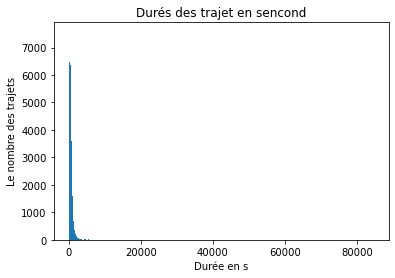

In [24]:
bins = np.arange(61, ford_gobike_df.duration_sec.max()+30,30)
plt.hist(data=ford_gobike_df,x='duration_sec',bins=bins);
plt.title('Durés des trajet en sencond')
plt.xlabel('Durée en s')
plt.ylabel('Le nombre des trajets');

>La distribution des durées semble fortement asymétrique vers la droite. La transformation d'échelle logarithmique est bien indiquée.
Mais premièrement, je vais représenter les durées en minutes pour faciliter l'interprétation.

In [25]:
ford_gobike_df['duration_min'] = ford_gobike_df.duration_sec/60

In [26]:
ford_gobike_df.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

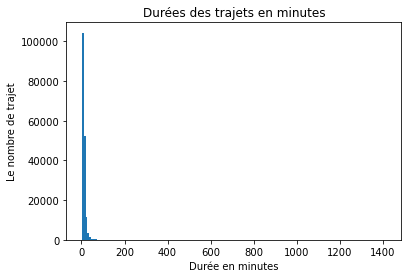

In [27]:
bins = np.arange(1, ford_gobike_df.duration_min.max()+9,9)
plt.hist(data=ford_gobike_df,x='duration_min',bins=bins);
plt.title('Durées des trajets en minutes')
plt.xlabel('Durée en minutes')
plt.ylabel('Le nombre de trajet');

> Transformation logarithmique

In [28]:
np.log10(ford_gobike_df.duration_min).describe()

count    174952.000000
mean          0.929673
std           0.305190
min           0.007179
25%           0.731051
50%           0.929419
75%           1.118926
max           3.148952
Name: duration_min, dtype: float64

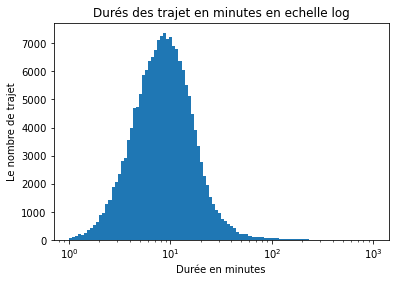

In [29]:
binslog = 10**np.arange(0, 3+0.03,0.03)
plt.hist(data=ford_gobike_df,x='duration_min',bins=binslog);
plt.title('Durés des trajet en minutes en echelle log')
plt.xscale('log')
plt.xlabel('Durée en minutes')
plt.ylabel('Le nombre de trajet');

In [30]:
xticks = [1,2,5,10,20,50,100,200,500,1000,2000]
labels = [1,2,5,10,20,50,100,200,500,'1k','2k']

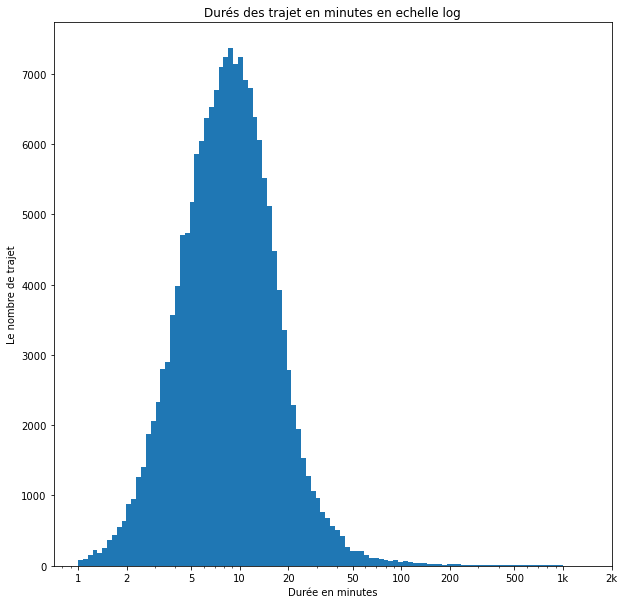

In [31]:
binslog = 10**np.arange(0, 3+0.03,0.03)
plt.figure(figsize=[10,10])
plt.hist(data=ford_gobike_df,x='duration_min',bins=binslog);
plt.title('Durés des trajet en minutes en echelle log')
plt.xscale('log')
plt.xticks(xticks,labels)
plt.xlabel('Durée en minutes')
plt.ylabel('Le nombre de trajet');

Nous avons des trajets de très longue durée. Ce qui suggère des valeurs aberrantes. Je vais choisir une plage de valeurs comprises dans l'intervalle [0,150] pour mieux comprendre la distribution.

<ipython-input-32-2d5eb75e2653>:7: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,150])


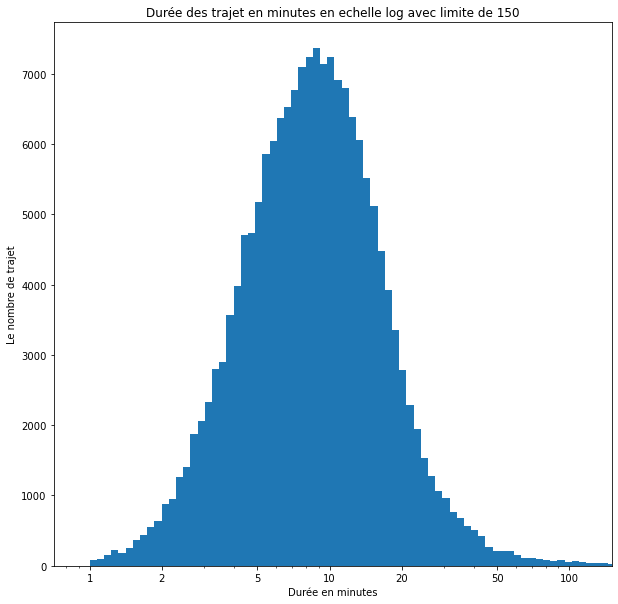

In [32]:
binslog = 10**np.arange(0, 3+0.03,0.03)
plt.figure(figsize=[10,10])
plt.hist(data=ford_gobike_df,x='duration_min',bins=binslog);
plt.title('Durée des trajet en minutes en echelle log avec limite de 150')
plt.xscale('log')
plt.xticks(xticks,labels)
plt.xlim([0,150])
plt.xlabel('Durée en minutes')
plt.ylabel('Le nombre de trajet');

> La distribution ressemble à une distribution normale. Il est évident que la transformation d'échelle et la limitation des valeurs nous donnent beaucoup plus d'informations sur la distribution des durées. Il semblerait que les trajets sont en majorité de courte durée, et compris entre 10 et 15 minutes.

> Je vais continuer avec la seconde variable d'intéret à savoir l'`age`.

In [33]:
ford_gobike_df.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

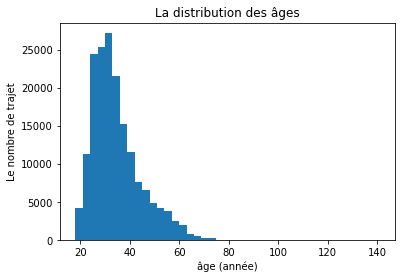

In [34]:
bins = np.arange(18, ford_gobike_df.age.max()+3,3)
plt.hist(data = ford_gobike_df, x='age',bins =bins)
plt.title('La distribution des âges')
plt.xlabel('âge (année)')
plt.ylabel('Le nombre de trajet');

> Tout comme avec la distribution des durées de traject, nous avons une distribution asymétrique vers la droite. Je vais faire une transformation logarithmique afin d'y voir plus claire dans cette distribution.

In [35]:
np.log10(ford_gobike_df.age.describe())

count    5.242919
mean     1.533986
std      1.005126
min      1.255273
25%      1.431364
50%      1.505150
75%      1.591065
max      2.149219
Name: age, dtype: float64

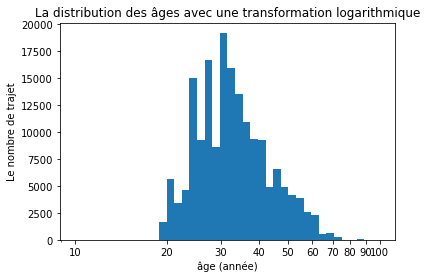

In [36]:
xticks = [10,20,30,40,50,60,70,80,90,100]
labels = ['{}'.format(i) for i in xticks]
binsize =0.025
bins = 10**np.arange(1,2+binsize,binsize)
plt.hist(data = ford_gobike_df, x='age',bins=bins)
plt.title('La distribution des âges avec une transformation logarithmique')
plt.xscale('log')
plt.xticks(xticks,labels)
plt.xlabel('âge (année)')
plt.ylabel('Le nombre de trajet');

> Il y a une queue, vers la droite qui suggère des valeurs aberrantes. Je vais observer la limite [15,75], pour mieux comprendre la distribution..

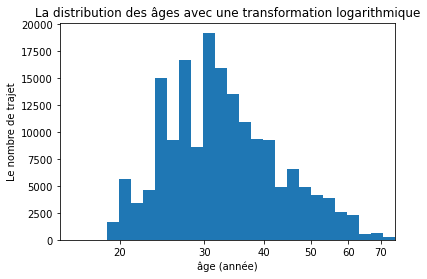

In [37]:
xticks = [10,20,30,40,50,60,70,80,90,100]
labels = ['{}'.format(i) for i in xticks]
binsize =0.025
bins = 10**np.arange(1,2+binsize,binsize)
plt.hist(data = ford_gobike_df, x='age',bins=bins)
plt.title('La distribution des âges avec une transformation logarithmique')
plt.xscale('log')
plt.xticks(xticks,labels)
plt.xlim([15,75])
plt.xlabel('âge (année)')
plt.ylabel('Le nombre de trajet');

La plut part des clients ont un age < 40 ans. Il serais interessant de voir si la durée du trajet est liée à l'âge.

##### Valeurs abérantes
> Je vais filtrer les âges > 75 et les trajets de plus 150 minutes

In [38]:
out = (ford_gobike_df.age>75)| (ford_gobike_df.duration_min>150)
out.sum()

660

> J'ai 660 lignes de valeurs>. Comme nous n'avons aucune moyen de régler ça, je les supprime. 

In [39]:
ford_gobike_df = ford_gobike_df[-out]

In [40]:
ford_gobike_df.shape

(174292, 20)

> Il nous reste desormain `174292`

>Je vais continuer avec les caractéristiques catégorielles.

* Les heures

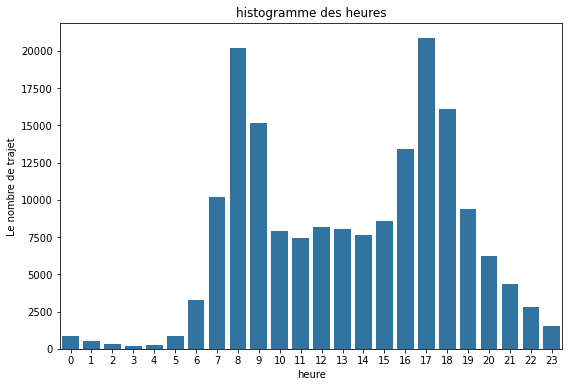

In [41]:
plt.figure(figsize=(9,6))
base_color = sb.color_palette()[0]
sb.countplot(data = ford_gobike_df, x = 'heure', color=base_color)
plt.ylabel('Le nombre de trajet')
plt.title('histogramme des heures');

> Il semble que les trajets commencent entre 7h et 9 h, ensuite, entre 17h et 18 h. Il se peut que les trajets soient des trajets pour aller au travail dans la plupart des cas.
* Les jours de la semaine

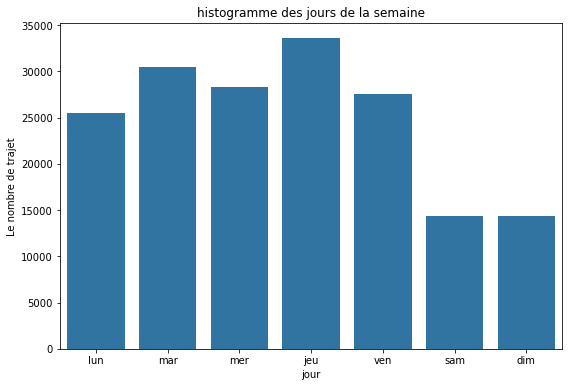

In [42]:
plt.figure(figsize=(9,6))
base_color = sb.color_palette()[0]
sb.countplot(data = ford_gobike_df, x = 'jour', color=base_color)
plt.ylabel('Le nombre de trajet')
plt.title('histogramme des jours de la semaine');

> Le pic des trajets est observé le jeudi, et en général au cours de la semaine. C'est-à-dire du lundi au vendredi qui correspond au jour d'ouvrable. Ce qui renforce l'intuition dès les trajets en début et fin de journée sont pour aller au travail le matin et rentrer le soir.
* Le type de client

In [43]:
ford_gobike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174292 entries, 4 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174292 non-null  int64         
 1   start_time               174292 non-null  datetime64[ns]
 2   end_time                 174292 non-null  datetime64[ns]
 3   start_station_id         174292 non-null  float64       
 4   start_station_name       174292 non-null  category      
 5   start_station_latitude   174292 non-null  float64       
 6   start_station_longitude  174292 non-null  float64       
 7   end_station_id           174292 non-null  float64       
 8   end_station_name         174292 non-null  category      
 9   end_station_latitude     174292 non-null  float64       
 10  end_station_longitude    174292 non-null  float64       
 11  bike_id                  174292 non-null  int64         
 12  user_type       

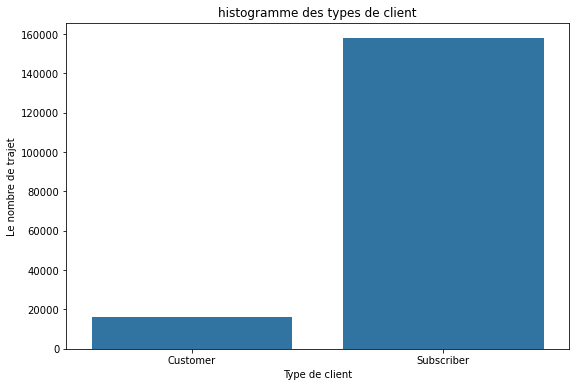

In [44]:
plt.figure(figsize=(9,6))
base_color = sb.color_palette()[0]
sb.countplot(data = ford_gobike_df, x = 'user_type', color=base_color)
plt.ylabel('Le nombre de trajet')
plt.xlabel('Type de client')
plt.title('histogramme des types de client');

> Le graphique nous montre clairement que la majorité des clients du système sont des abonnées.
* Velo pour tous les trajets.

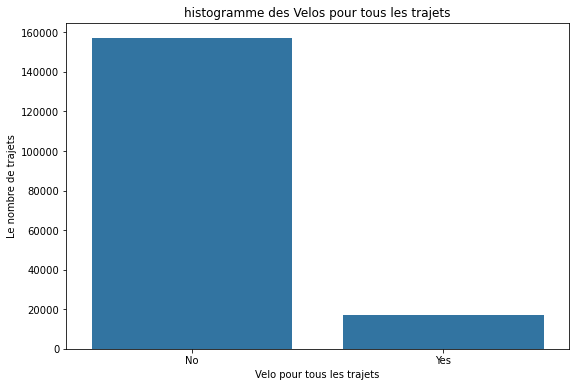

In [45]:
plt.figure(figsize=(9,6))
base_color = sb.color_palette()[0]
sb.countplot(data = ford_gobike_df, x = 'bike_share_for_all_trip', color=base_color)
plt.ylabel('Le nombre de trajets')
plt.xlabel('Velo pour tous les trajets')
plt.title('histogramme des Velos pour tous les trajets');

> La majorité des clients n'utilise pas de vélo pour tous les trajets.
* Le genre

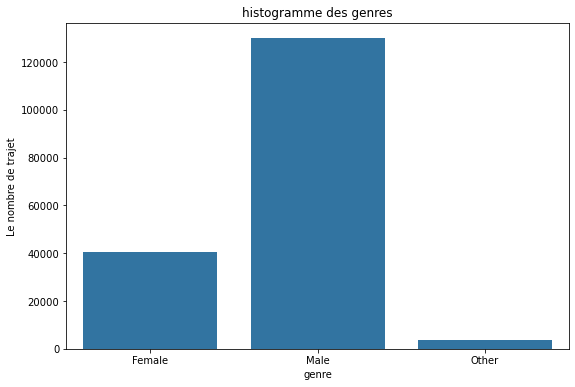

In [46]:
plt.figure(figsize=(9,6))
base_color = sb.color_palette()[0]
sb.countplot(data = ford_gobike_df, x = 'member_gender', color=base_color)
plt.ylabel('Le nombre de trajet')
plt.xlabel('genre')
plt.title('histogramme des genres');

> La plupart des clients sont des hommes avec très peu de femmes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> `La durée` avait une distribution qui semblait fortement asymétrique vers la droite. J'ai donc effectuez une transformation d'échelle logarithmique, la nouvelle distribution avait toujours une longue queue vers la droite, suggérant des valeurs aberrantes. Après avoir choisi 150 minutes comme limite supérieure, le graphe obtenu montrait une distribution très proche d'une distribution normale et il semblerait que les trajets sont pour la majorité de courte durée, et aient compris entre 10 et 15 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> La durée et l'âge ont présenté quelques problèmes de variables aberrantes. Toutes valeurs ont été supprimées pour plus de précaution.

## Bivariate Exploration

Pour commencer, je souhaite examiner les corrélations par paires présentes entre les caractéristiques des données.

In [47]:
# variables numériques
numeric_vars = ['duration_min', 'end_time','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude','age' ]

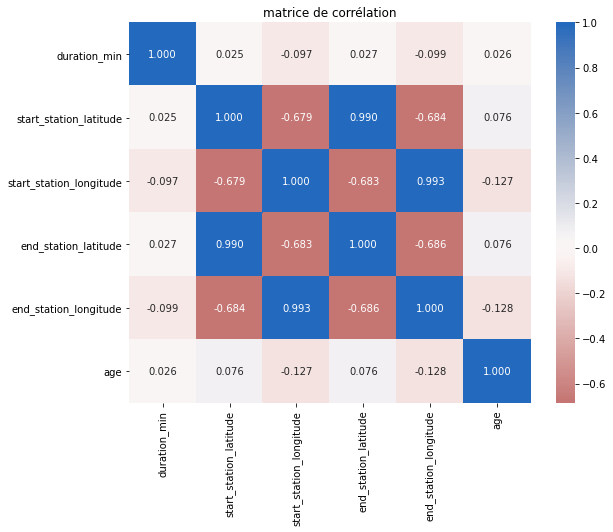

In [48]:
# matrice de corrélation
plt.figure(figsize = [9, 7])
plt.title('matrice de corrélation')
sb.heatmap(ford_gobike_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


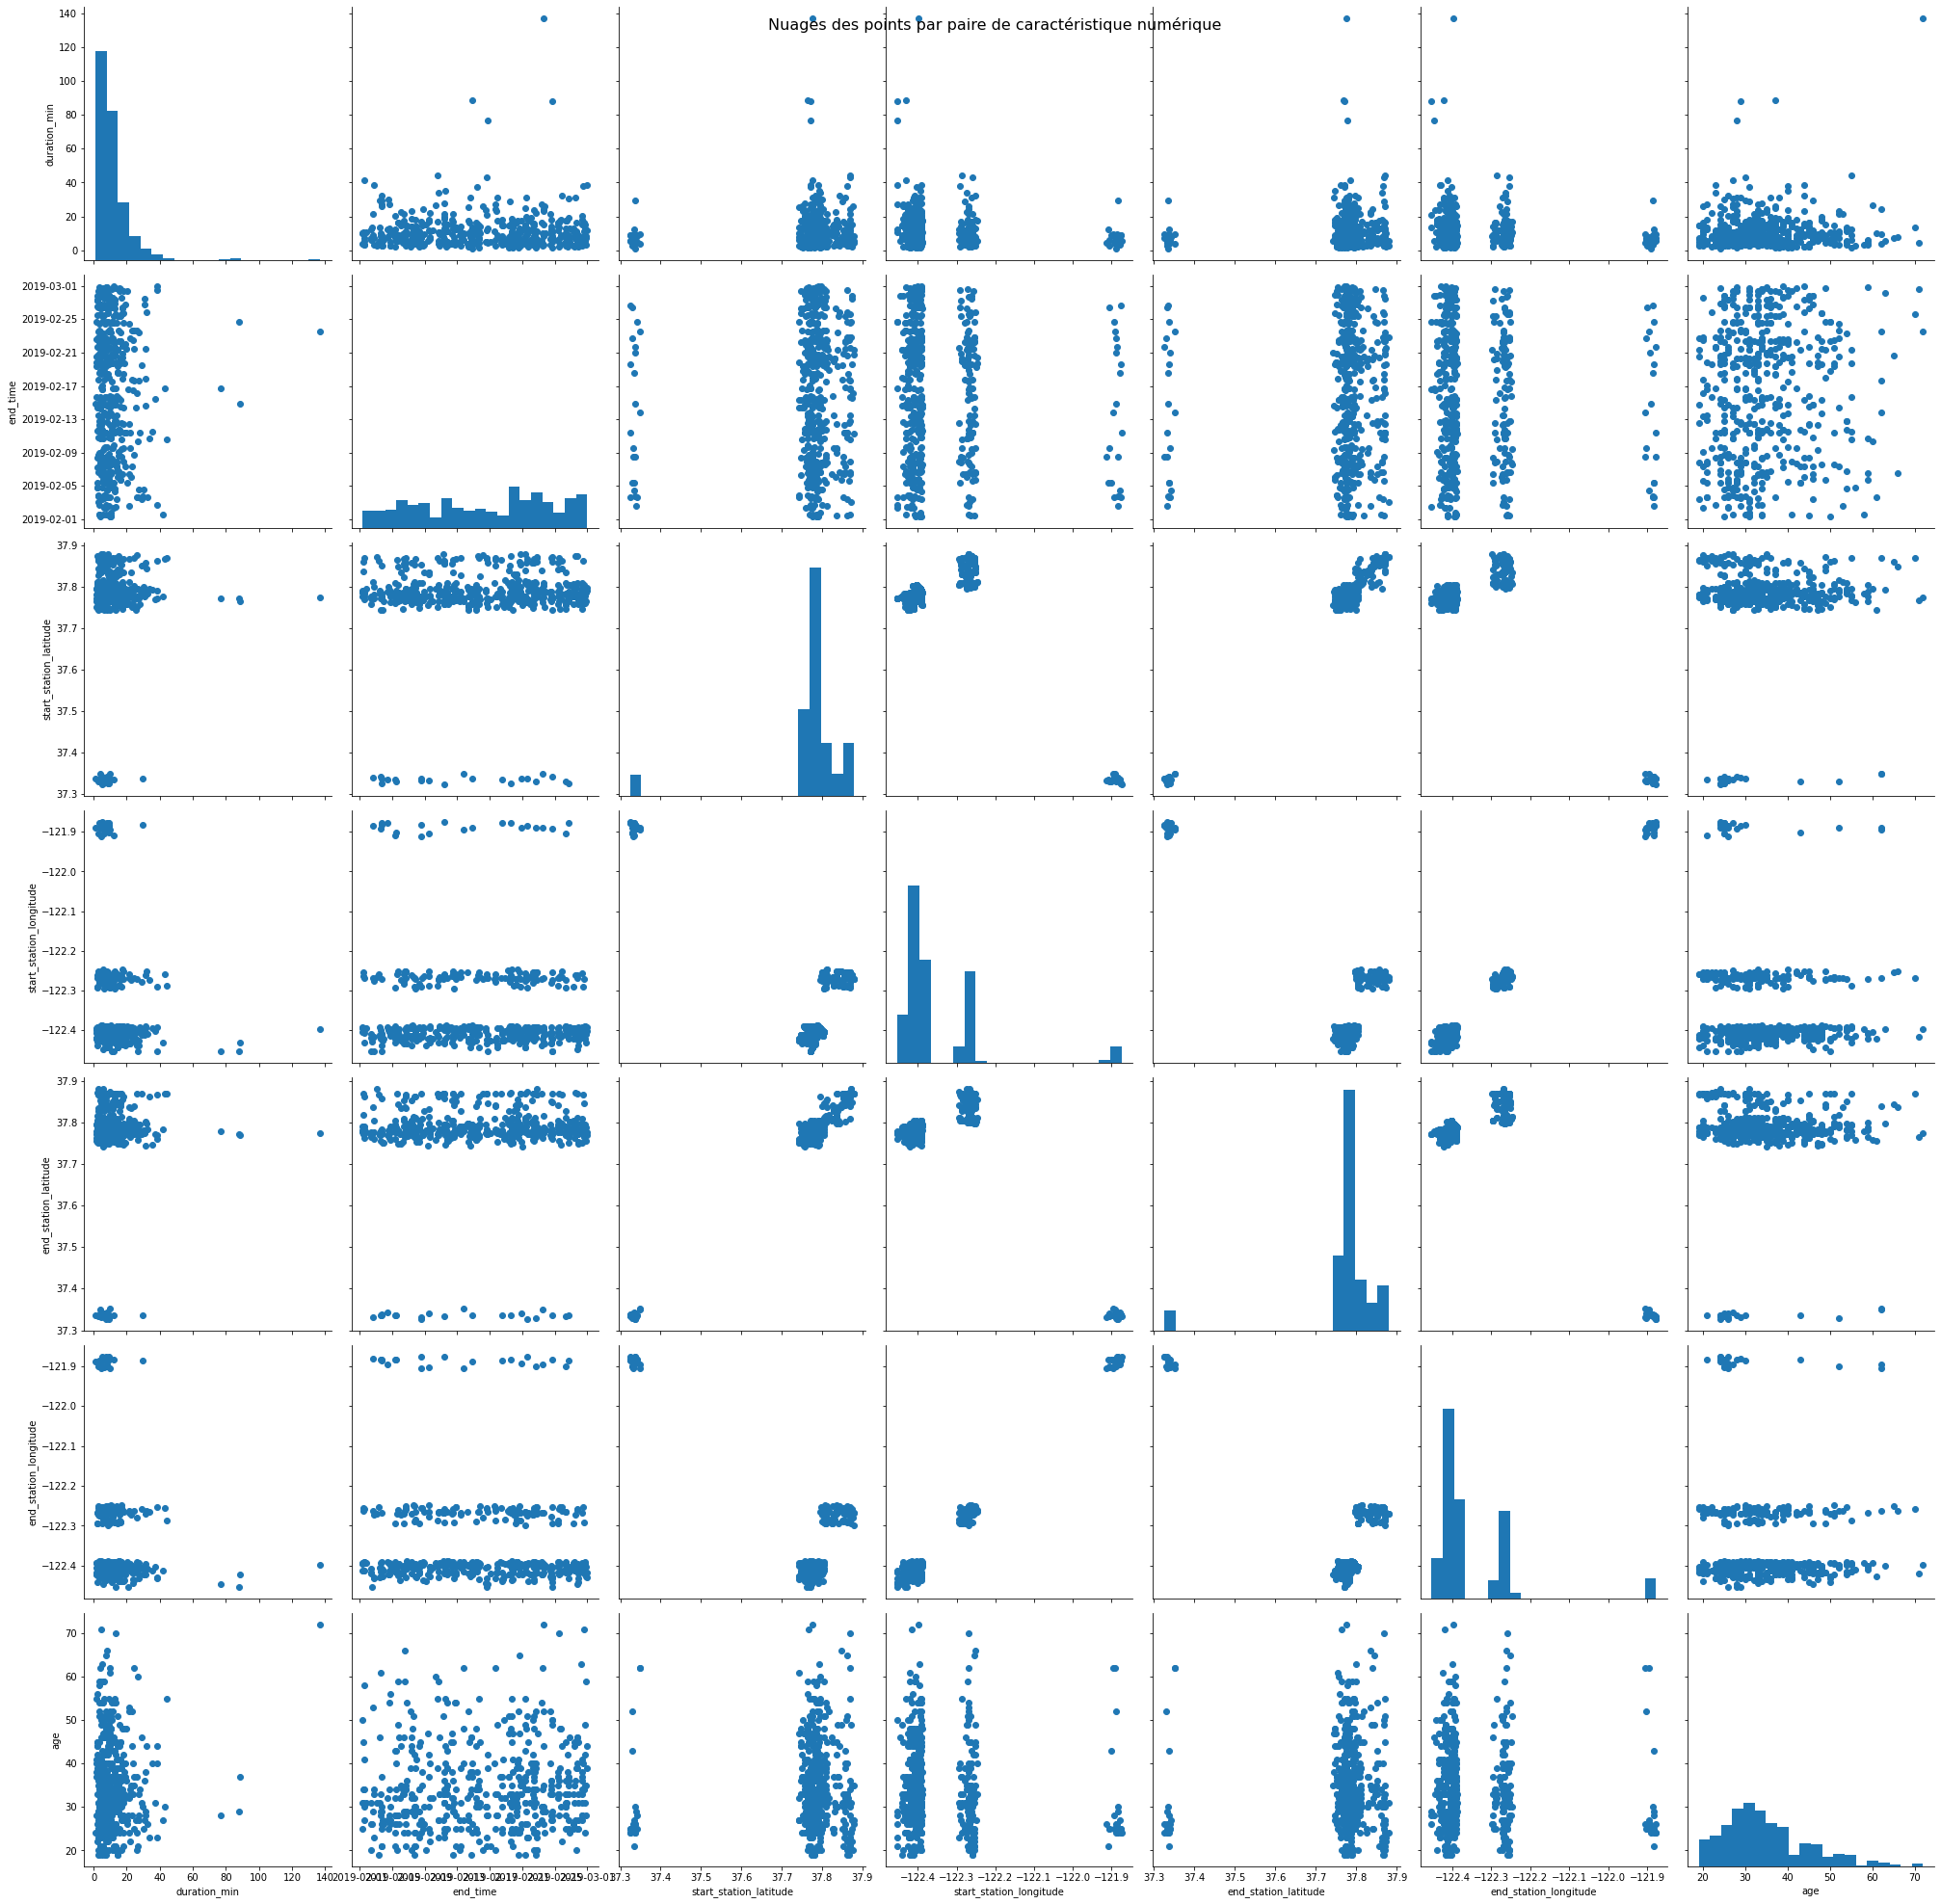

In [49]:
samples = np.random.choice(ford_gobike_df.shape[0], 500, replace = False)
samples_df = ford_gobike_df.sample(500, replace=True)

g = sb.PairGrid(data = samples_df, vars = numeric_vars, size=4, aspect=1)
g.fig.suptitle("Nuages des points par paire de caractéristique numérique", fontsize=16)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

> Il semble n'y avoir aucune relation linéaire entre les variables numériques hormis les informations des coordonnées géographiques. Néanmoins, l'âge et la durée ont une corrélation positive. Je vais voir de plus près cette relation un peu plus loin dans cette section.

**Passons maintenant à l'examen de la corrélation entre la durée et l'âge en carats et les variables catégorielles.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anacond

<Figure size 3240x360 with 0 Axes>

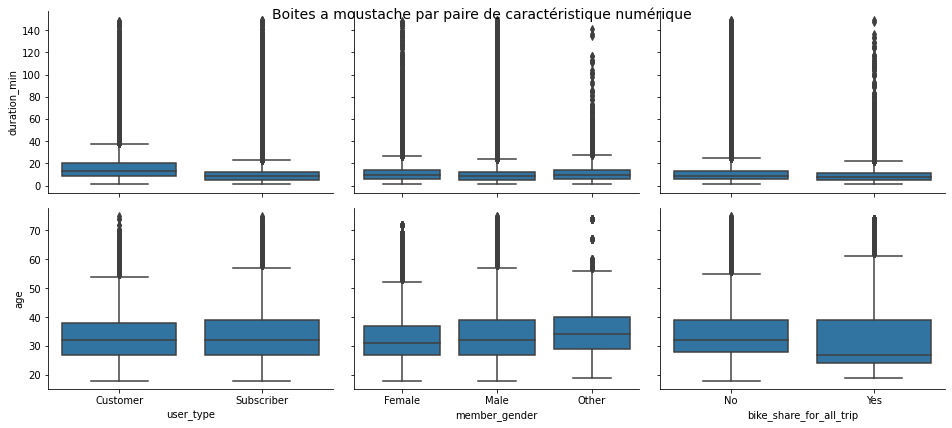

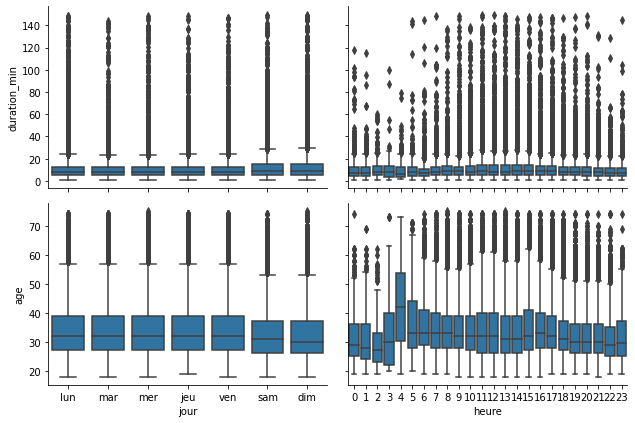

In [50]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
categoric_vars = ['user_type','member_gender','bike_share_for_all_trip']
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [45, 5])
g = sb.PairGrid(data = ford_gobike_df, y_vars = ['duration_min', 'age'], x_vars = categoric_vars,
                height= 3, aspect = 1.5)
g2 = sb.PairGrid(data = ford_gobike_df, y_vars = ['duration_min', 'age'], x_vars = ['jour','heure'],
                height = 3, aspect = 1.5)
g.map(boxgrid)
g.fig.suptitle("Boites a moustache par paire de caractéristique numérique", fontsize=14)
g2.map(boxgrid)
plt.show();

Le graphique nous apprend beaucoup sur les relations qui peuvent exister entre les variables numériques et les variables catégorielles qui sont rentées.
>Les trajets qui durent le plus en moyenne sont effectués pour des clientes non abonnées. Pour les types de clients, ils sont de ceux qui utilisent aussi les vélos pour tous les trajets. Pour le genre, ce sont les femmes qui effectuent de longs trajets par rapport aux hommes. Les trajets les samedi et dimanche dure plus longtemps en moyenne. La durée moyenne des trajets se concentre en plusieurs milieux de journée. C’est-à-dire entre 8h et 18H.
>
>L'âge moyenne des clients non abonnés sont plus élevés que celui des abonnés. Ainsi que l'âge des hommes par rapport aux autres sexes. Comme pour la durée, la moyenne des âges de ceux qui n'utilisent pas les vélos pour tous les trajets est le plus élevée. Et en moyenne, ceux qui font des trajets en cours de semaine (du lundi au vendredi) sont plus âgés que ceux qui le font en week-ends. La moyenne des âges la plus élevée est celle des clients de 5h du matin. CCe qui est notable en plus est qu'en moyenne, ce sont les moins âgés qui commencent des trajets entre 0h et 4h.

* Examinons les relations entre les variables catégorielles

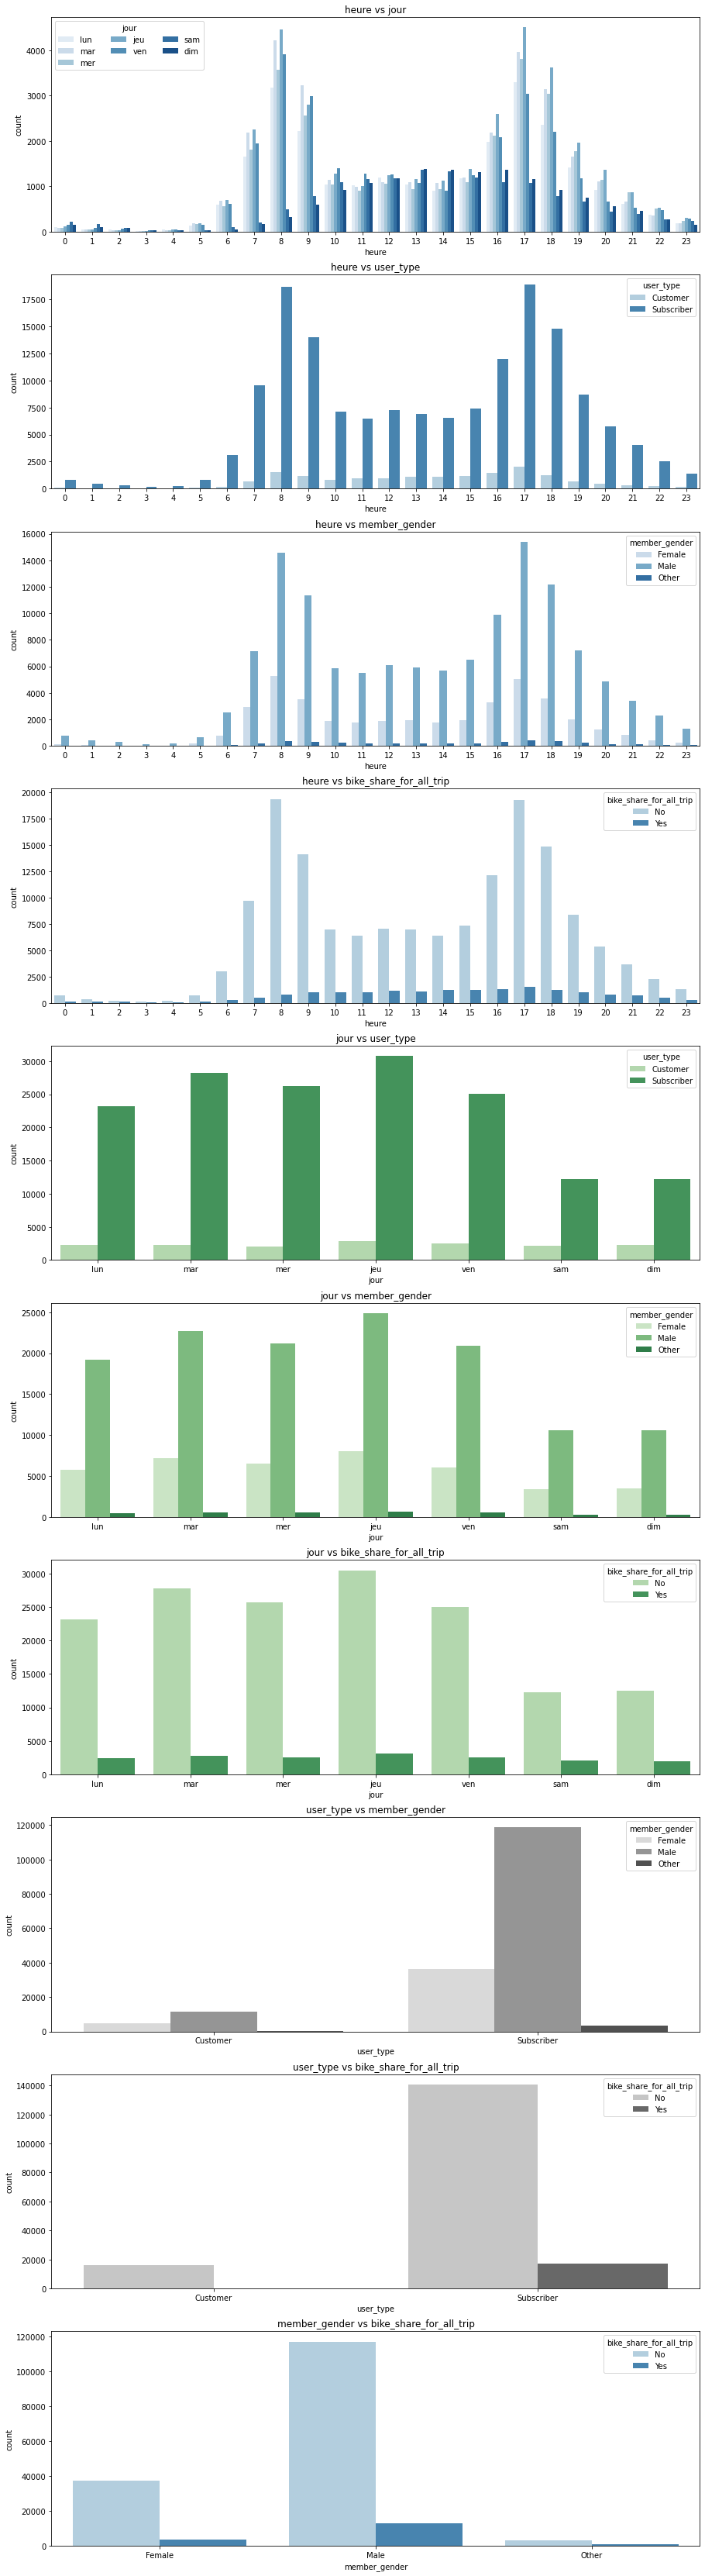

In [51]:
from itertools import combinations

#listes de couleur à appliquer dans les graphes
color = ['Blues','Greens','Greys','Blues','Greens']

#Listes des catégories
categoric_vars = ['heure','jour','user_type','member_gender','bike_share_for_all_trip']

# combinaison des couleurs
temp_col = combinations(color,2)

#avoir autant de couleur que de graph
comb_col = list(temp_col)

# Combinaison possible des catégories
temp = combinations(categoric_vars, 2)
comb = list(temp)

plt.figure(figsize = [15, 60])

for i,j,col in zip(comb,range(1,len(comb)+1),comb_col):
    ax = plt.subplot(len(comb), 1, j)
    ax.title.set_text(i[0]+' vs '+i[1])
    sb.countplot(data = ford_gobike_df, x = i[0], hue = i[1], palette = col[0])
    ncol = len(ford_gobike_df[i[1]].unique())
    if ncol>=4:
        # pour éviter  les chevauchements
        ax.legend(ncol = (ncol//3)+1,title=i[1])
plt.show()

On voit sur le graphique
* `heure vs jour`: le jeu enregistre le plus grand nombre de trajet en 08h et 18h.
* `heure vs user_type`: Les abonnées vont plus de trajets que les clientes non abonnées avec des pics observés entrés à 8h et à 17h.
* `heure vs member_gender`: Quel que soit le moment de la journée, les hommes effectuent beaucoup plus de trajets que les autres sexes.
* `heure vs bike_share_for_all_trip`: Il est clair que les clients utilisent plus les vélos qui ne sont pas pour tous les trajets.
* `jour vs user_type`: Comme à toute heure de la journée, quel que soient le jour de la semaine les abonnées vont plus de trajets ques les clients non abonnés.
* `jour vs member_gender`: Les hmmes effectuent beaucoup plus de trajets par rapport autres sexes quelque soit le jour de la semaine.
* `jour vs bike_share_for_all_trip` : Les vélos qui ne sont pas pour tous les trajets sont de loin le plus utilisé.
* `user_type vs member_gender ` : La plupart des clients abonnés sont des hommes de même que les clients non abonnés.
* `user_type vs bike_share_for_all_trip`: Tous les clients non abonnés utilisent des vélos qui ne sont pas pour tous les trajets aussi que la majorité de ceux qui sont abonnés.
* `member_gender vs bike_share_for_all_trip`: Les vélos qui ne sont pas pour tous les trajets sont en majoré utilisé par les hommes.

> Pendant la visualisation des corrélations des variables numériques il semblait ne pas avoir de ces relations entre nos variables d'intérêt, notamment entre la durée d'un trajet et l'âge. Néanmoins nous avons une corrélation positive. Je vais voir cette relation de plus près en opérant des transformations d'échelle des durées et des âges.

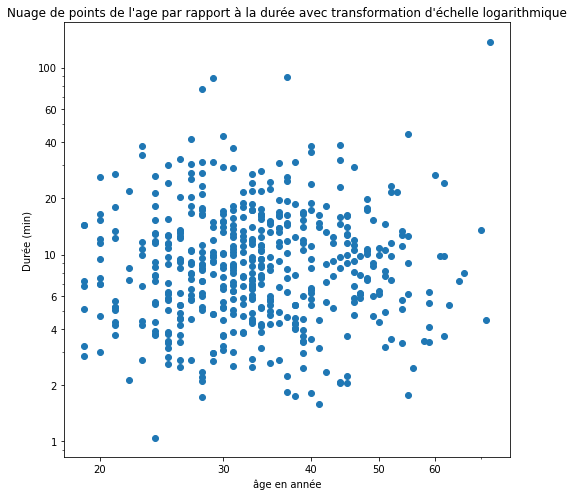

In [52]:
plt.figure(figsize=(8,8))

plt.scatter(data=samples_df, x='age', y='duration_min')

yticks = [1,2,4,6,10,20,40,60,100]
ylabels = ['{}'.format(i) for i in yticks]
xticks = [20,30,40,50,60]
xlabels = ['{}'.format(i) for i in xticks]

plt.xscale('log')
plt.yscale('log')

plt.xticks(xticks,xlabels)
plt.yticks(yticks,ylabels)
plt.title("Nuage de points de l'age par rapport à la durée avec transformation d'échelle logarithmique")
plt.xlabel('âge en année')
plt.ylabel('Durée (min)');

> Après la visualisation des données des âges en fonction de la durée avec transformation logarithmique des échelles, il semblerait qu'il n'y a pas de relation linéaire entre la durée des trajets et l'âge des clients.

* Je vais voir l'effet des transformation sur la distribution des variables catégorielles.

In [53]:
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return 10**x

In [54]:
# Creation des vcolonnes log_duration et log_age pour les transformation d'echèlle
ford_gobike_df['log_duration'] = ford_gobike_df.duration_min.apply(log_trans)
ford_gobike_df['log_age'] = ford_gobike_df.age.apply(log_trans)

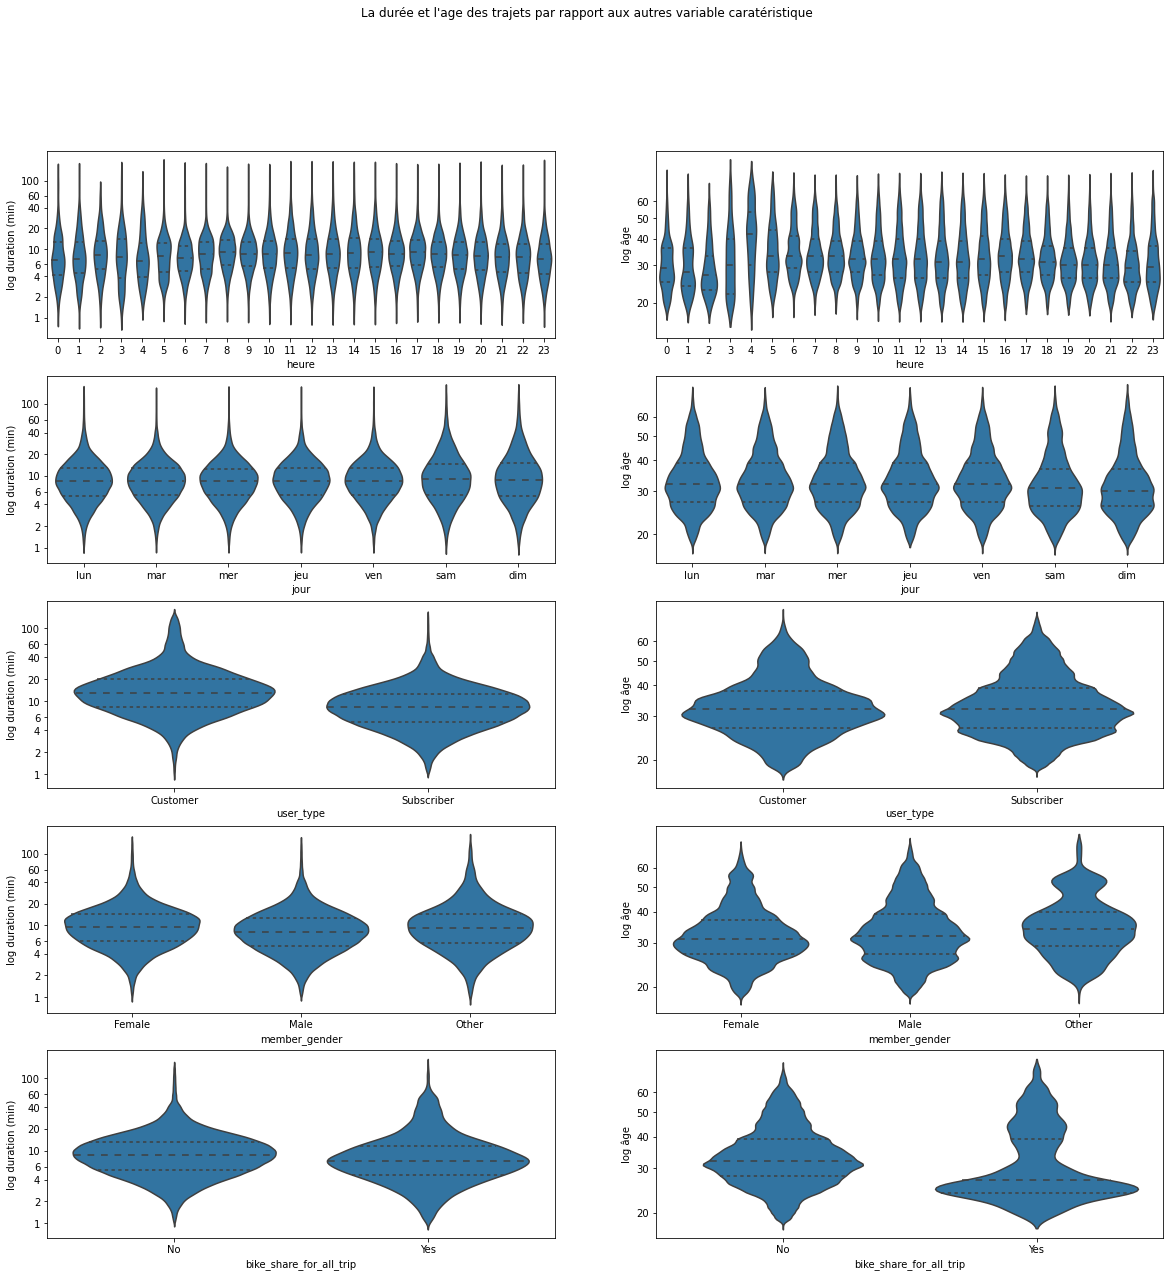

In [55]:
categoric_vars = ['heure','jour','user_type','member_gender','bike_share_for_all_trip']
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(ncols = 2, nrows = len(categoric_vars) , figsize = [20,20])

ylabels = ['{}'.format(i) for i in yticks]
xticks = [20,30,40,50,60]
xlabels = ['{}'.format(i) for i in xticks]
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data=ford_gobike_df, x=var, y='log_duration', color=base_color, inner='quartile', ax=ax[i,0])
    ax[i,0].set_yticks(log_trans(np.array([1,2,4,6,10,20,40,60,100])))
    ax[i,0].set_yticklabels([1,2,4,6,10,20,40,60,100])
    ax[i,0].set_ylabel('log duration (min)')
    
    sb.violinplot(data=ford_gobike_df, x=var, y='log_age', color=base_color, inner='quartile', ax=ax[i,1])
    ax[i,1].set_yticks(log_trans(np.array([20,30,40,50,60])))
    ax[i,1].set_yticklabels([20,30,40,50,60])
    ax[i,1].set_ylabel('log âge')
fig.suptitle("La durée et l'age des trajets par rapport aux autres variable caratéristique")  
plt.show()

> Après la transformation des variables âges et durées, il semble que la durée des trajets ait proche à tout moment de la journée et quel que soit le jour de la semaine. Par contre les clients abonnés ont des trajets de durée plus élevé. Les durées des trajets sont presque équivalentes quel que soit le sexe. Les vélos qui ne sont pas pour tous les trajets ont légèrement des trajets de durée élevée.
>La moyenne des âges ne dépend pas aussi des jours de la semaine ou du sexe. Les abonnées sont un peu plus âgées. Et aussi les personnes plus âgées utilisent des vélos qui ne sont pas pour tous les trajets. L'âge est généralement uniforme quelles que soient les heures de la journée, sauf entre 3h et 4h du matin.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Pendant la visualisation des corrélations entre les variables numériques il ne semblait pas avoir de relation linéaire forte entre les variables, hormis les informations des coordonnées géographiques.
Les trajets qui durer le plus en moyenne sont effectués pour des clientes non abonnées les types de clients, ils sont de ceux aussi qui utilisent les veli pour tous les trajets.
Pour le genre, ce sont les femmes effectuent des trajets de long duré par rapport aux hommes.
Les trajets les samedi et dimanche sur plus longtemps en moyenne. La durée moyenne de trajet se concentre en plusieurs milieux de journée c'est dire entre 8h et 18 h. L'âge moyenne des clients qui ne sont pas abonné et plus élevé que pour les abonnées. Ainsi que l'âge des hommes par rapport aux autres sexes.
Comme pour la durée, la moyenne des âges de ceux qui n'utilisent pas les vélos pour tous les trajets est le plus élevé. et en moyenne ceux qui font des trajets encours de semaine (du lundi au vendredi) sont plus âgés que ceux qui le font en week-ends. La moyenne des âges la plus élevée est pour les clients de 5h du matin. Ce qui est notable en plus et c'est en moyenne les moins âgés qui commencent des trajets entre 0h et 4h.
>
>Après une transformation logarithmique des variables de durée et d'âge, il est ressorti qu'il n'avait aucune relation linéaire entre l'âge et la durée des trajets.
Aussi, il semble que la durée des trajets ait proche à tout moment de la journée et quel que soit le jour de la semaine. Par contre les clients abonnés ont des trajets durée plus élevé. Les durées des trajets sont presque équivalentes quel que soit le sexe.
Les vélos qui ne sont pas pour tous les trajets ont légèrement des trajets de durée élevée. La moyenne des âges ne dépend pas aussi des jours de la semaine, au dû sexe. 
Les abonnées sont un peu plus âgées. Et aussi les personnes plus âgées utilisent des vélos qui ne sont pas pour tous les trajets. L'âge est généralement uniforme quelles que soient les heures de la journée, sauf entre 3h et 4h du matin.
>
> Le jeu enregistre le plus grand nombre de trajet en 08h et 18 h. Les abonnées vont plus de trajets ques les clientes non abonnées avec des pics observés entrés à 8h et à 17 h. Quel que soit le moment de la journée, les hommes effectuent beaucoup plus de trajets que les autres sexes.
Il est clair que les clients utilisent plus les vélos qui ne sont pas pour tous les trajets. Comme à toute heure de la journée, quel que soient le jour de la semaine les abonnées font plus de trajets que les clientes non abonnées. Les hommes effectuent beaucoup plus de trajets par rapport autres sexes quel que soit le jour de la semaine. Les vélos qui ne sont pas pour tous les trajets sont de loin le plus utilisé.
La plupart des clients abonnés sont des hommes de même que les clientes non abonnées. Tous les clients non abonnés utilisent des vélos qui ne sont pas pour tous les trajets aussi que la majorité de ceux qui sont abonnés. Les vélos qui ne sont pas pour tous les trajets sont en majoré utilisé par les hommes.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Il semble avoir une relation entre les vélos pour tous les trajets et les variables les heures et les jours, l'âge et la durée des trajets. .il ne semblent avoir aucune relation linéaire entre les variables numériques. Les trajets qui durent le plus en moyenne sont effectués pour des clientes non abonnées pour le type de client, ils sont de ceux aussi qui utilisent les vélos pour tous les trajets. 

## Multivariate Exploration

Je vais faire une comparaison des caractéristiques catégorielles en fonction de la durée moyenne des trajets à vélo.

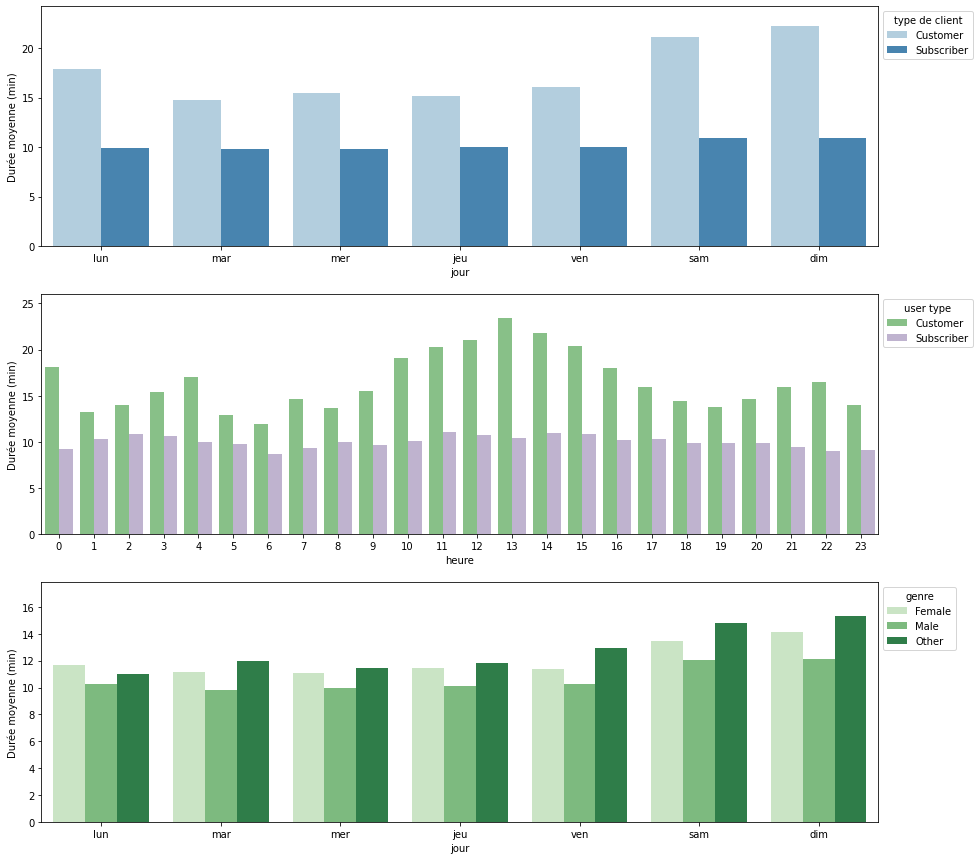

In [56]:
fig, ax = plt.subplots(nrows=3, figsize=[15,15])

sb.barplot(data=ford_gobike_df, x='jour', y='duration_min', hue='user_type', palette='Blues', errwidth=0, ax=ax[0])
ax[0].set_ylabel('Durée moyenne (min)')

ax[0].legend(loc=2, title='type de client', bbox_to_anchor=(1,1))
sb.barplot(data=ford_gobike_df, x='heure', y='duration_min', hue='user_type', palette='Accent', errwidth=0, ax=ax[1])
ax[1].set_ylabel('Durée moyenne (min)')
ax[1].legend(loc=2, title='user type', bbox_to_anchor=(1,1))
sb.barplot(data=ford_gobike_df, x='jour', y='duration_min', hue='member_gender', palette='Greens', errwidth=0, ax=ax[2])
ax[2].set_ylabel('Durée moyenne (min)')

ax[2].legend(loc=2, title='genre', bbox_to_anchor=(1,1))
plt.show()

> Les clients qui ne sont pas abonnés ont des trajets de durée moyenne plus élevé quels que soient les jours de la semaine et le moment de la journée.
La durée moyenne des trajets est plus élevée chez les femmes que chez les hommes.

* Je souhaite explorer dans cette partie de l'analyse, la manière dont les mesures catégorielles  jouent un rôle dans la relation entre la durée et l'âge.

In [57]:
ford_gobike_df.log_age.describe()

count    174292.000000
mean          1.516431
std           0.117284
min           1.255273
25%           1.431364
50%           1.505150
75%           1.591065
max           1.875061
Name: log_age, dtype: float64

In [58]:
ford_gobike_df.log_duration.describe()

count    174292.000000
mean          0.926263
std           0.295106
min           0.007179
25%           0.731051
50%           0.929419
75%           1.117271
max           2.174641
Name: log_duration, dtype: float64

In [59]:
def hist2dgrid(x, y, **kwargs):
    palette=kwargs.pop('color')
    bins_x =np.arange(1,2+0.03,0.03)
    bins_y =np.arange(0, 2+0.1, 0.1)
    plt.hist2d(x, y, bins=[bins_x,bins_y], cmap=palette, cmin=0.5)
    plt.xticks(log_trans(np.array([20,30,40,50,60,70,80])),[20,30,40,50,60,70,80])
    plt.yticks(log_trans(np.array([1,2,5,10,20,50,100])),[1,2,5,10,20,50,100])

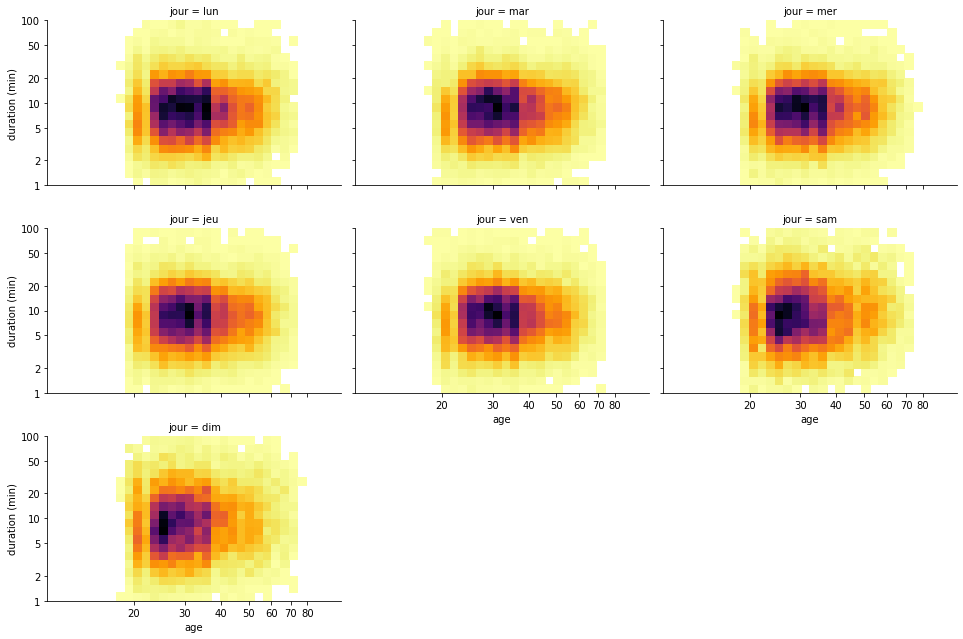

In [60]:
g = sb.FacetGrid(data = ford_gobike_df, col = 'jour', col_wrap=3, height=3, aspect=1.5)
g.map(hist2dgrid, 'log_age', 'log_duration', color='inferno_r')
g.set_xlabels('age')
g.set_ylabels('duration (min)')
plt.show();

> Il semble que les personnes âgées effectuent leurs trajets encours de semaine et ce sont des trajets de courte durée. Nous avons des trajets de longue durée pendant les Week-end et ces trajets sont effectués par des jeunes.

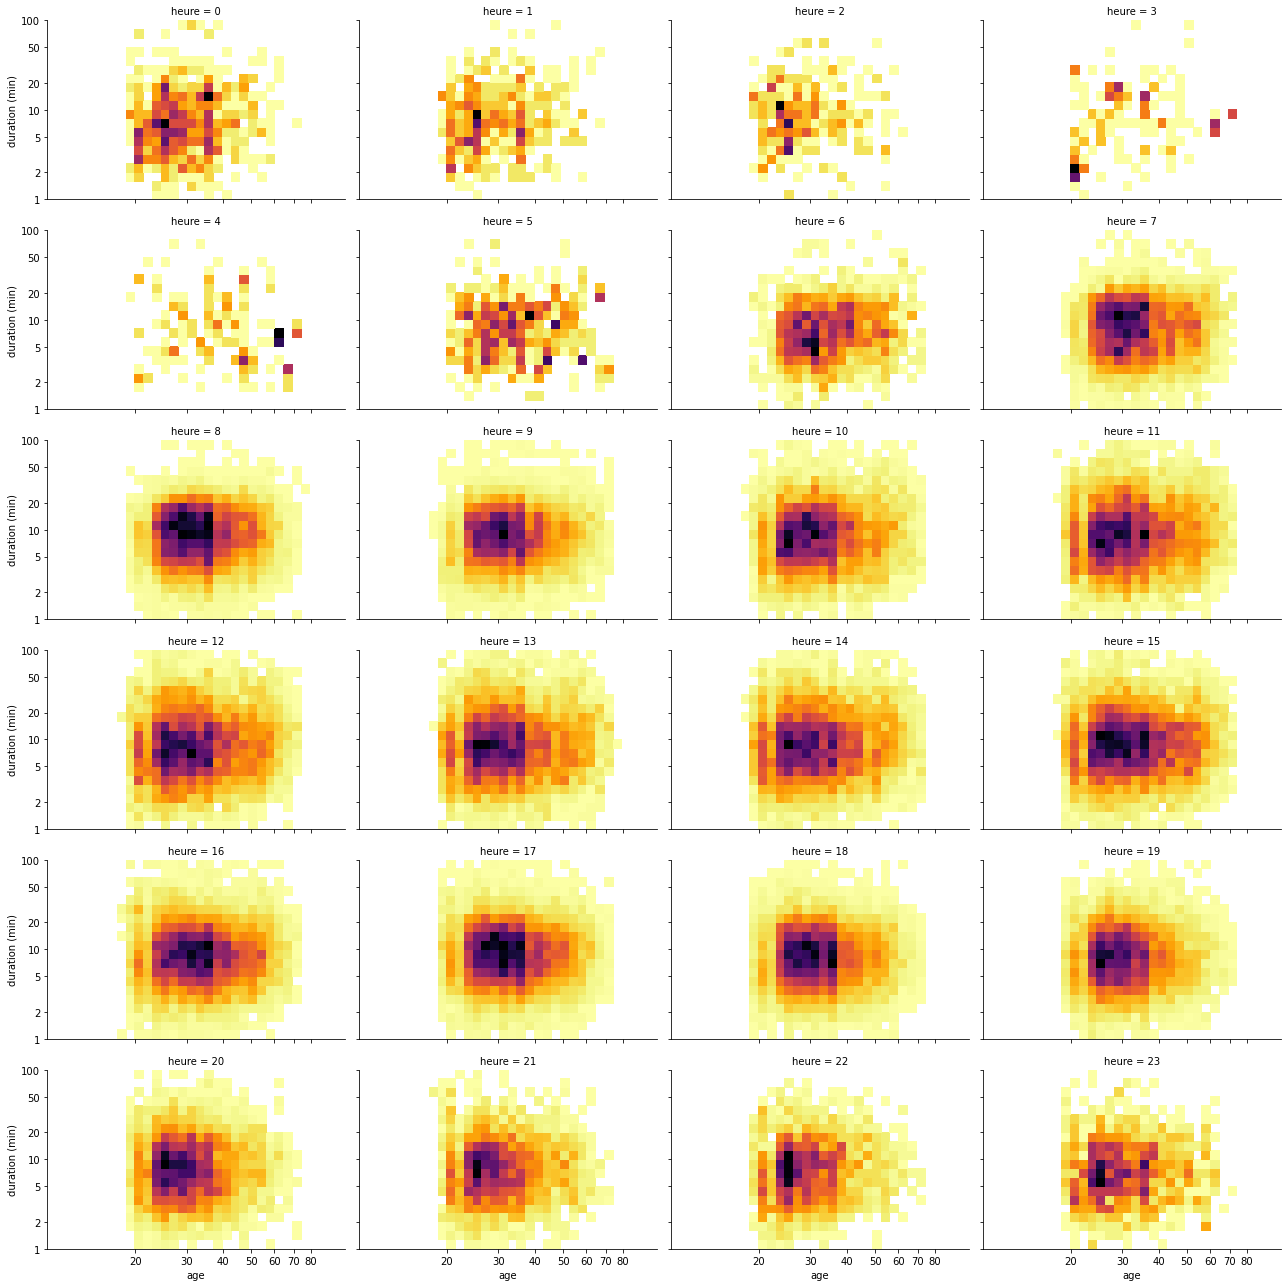

In [61]:
g = sb.FacetGrid(data = ford_gobike_df, col = 'heure', col_wrap=4, height=3, aspect=1.5)
g.map(hist2dgrid, 'log_age', 'log_duration', color='inferno_r')
g.set_xlabels('age')
g.set_ylabels('duration (min)')
plt.show();

> Les données en 00h et 06h ne nous permettent pas d'interpréter. Par la suite nous pouvons voir que les milieurs de journée (11 h-16 h) et les soirées (19 h-23 h), les trajets sont de longue durée et sont effectués par les personnes jeunes. Et nous avons tout le contraire le reset de la journée (7 h-10hs et 16 ), nous avons des personnes âgées et des trajets de courtes durées.

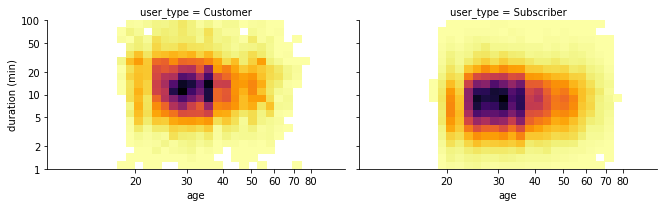

In [62]:
g = sb.FacetGrid(data = ford_gobike_df, col = 'user_type', col_wrap=4, height=3, aspect=1.5)
g.map(hist2dgrid, 'log_age', 'log_duration', color='inferno_r')
g.set_xlabels('age')
g.set_ylabels('duration (min)')
plt.show();

> Les clients qui sont abonnés sont le plus âge et effectuent des trajets de courte durée, contrairement au plus jeune qui n'est pas abonnée et effectuent de longs trajets.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


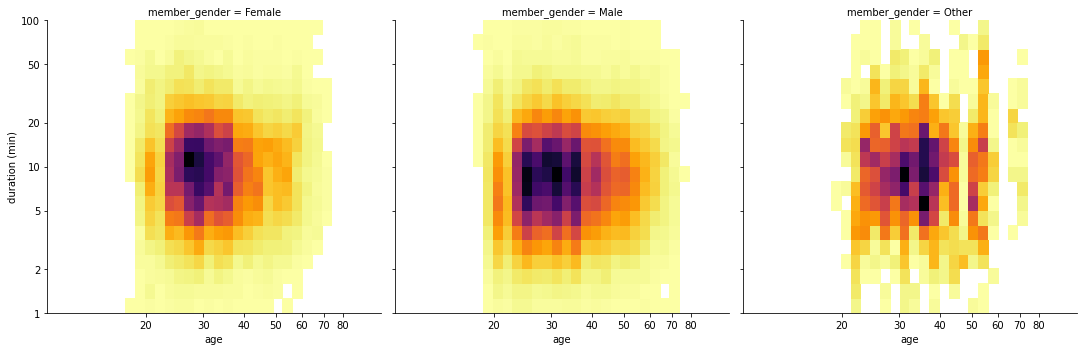

In [63]:
g = sb.FacetGrid(data = ford_gobike_df, col = 'member_gender', col_wrap=4, size=5)
g.map(hist2dgrid, 'log_age', 'log_duration', color='inferno_r')
g.set_xlabels('age')
g.set_ylabels('duration (min)')
plt.show();

> Ce graphe nous apprend que les clients âgés qui effectuent des trajets courts sont plus des hommes et que les femmes effectuent des trajets plus longs et sont plus jeunes.

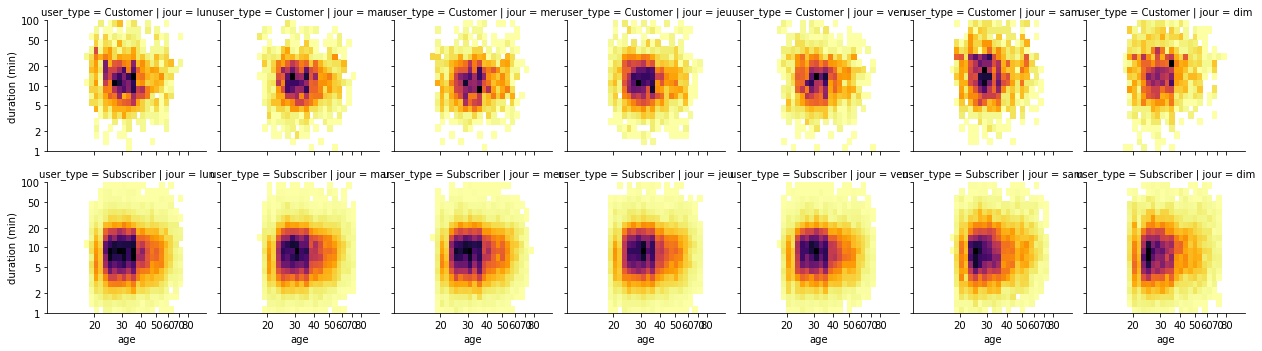

In [64]:
g = sb.FacetGrid(data = ford_gobike_df, row='user_type', col = 'jour', size=2.5)
g.map(hist2dgrid, 'log_age', 'log_duration', color='inferno_r', margin_titles =True)
g.set_xlabels('age')
g.set_ylabels('duration (min)')
plt.show();

> J'ai essayé de regarder des cartes thermiques à facettes à travers les niveaux d'heure, de jour de la semaine et de variables de type d'utilisateur ensemble, mais il semble qu'il y ait trop de facettes à regarder. Essayons de diviser le jeu de données en deux selon l'âge pour essayer obtenir une idée plus claire de ce qui se passe.

In [65]:
ford_gobike_df.age.max()/2

37.5

 ***Nous pouvons concidérer que les jeunes ont un ages inferieurs où égal à 38 ans et les plus âgés ont plus de 38 ans***

In [66]:
jeunes = ford_gobike_df[ford_gobike_df['age'] <= 38]
adults = ford_gobike_df[ford_gobike_df['age'] > 38]

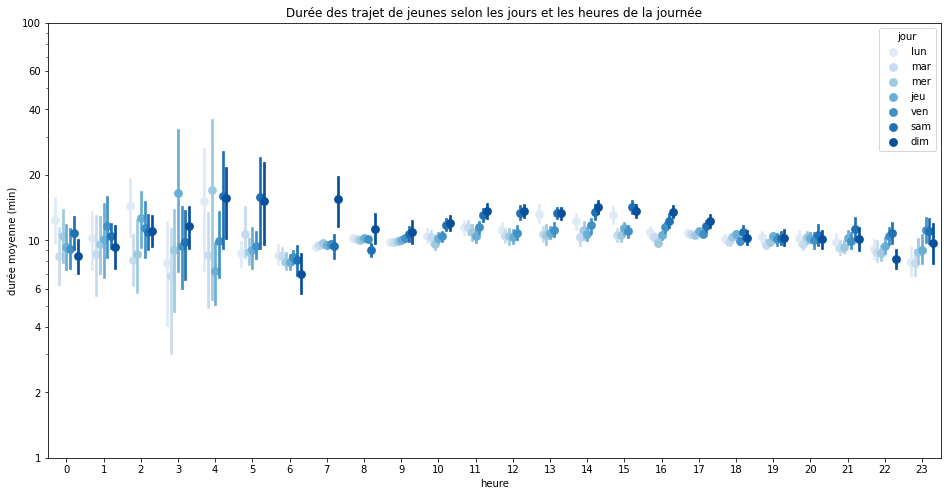

In [67]:
fig = plt.figure(figsize=[16,8])
ax = sb.pointplot(data=jeunes, x='heure', y='duration_min', hue='jour', linestyles="", palette='Blues', dodge=0.6)
plt.title('Durée des trajet de jeunes selon les jours et les heures de la journée')
plt.ylabel('durée moyenne (min)')
plt.yscale('log')
plt.yticks([1,2,4,6,10,20,40,60,100],[1,2,4,6,10,20,40,60,100])
plt.show()

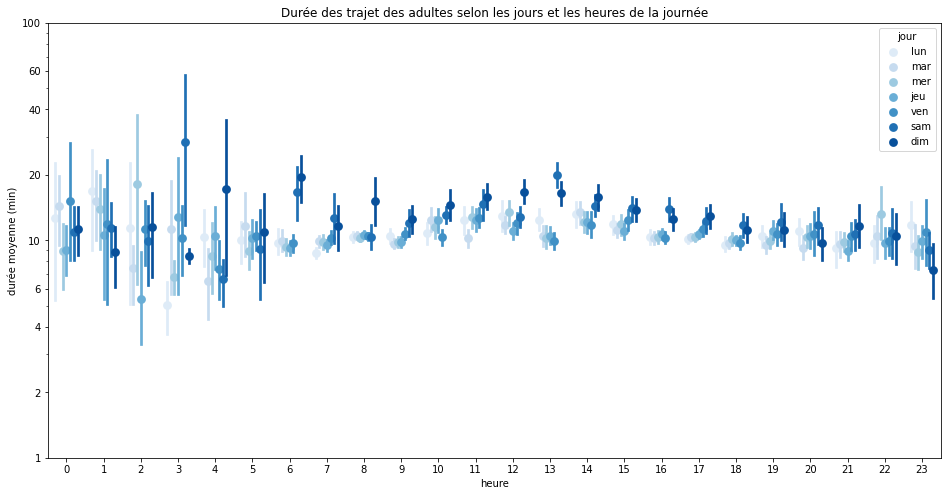

In [68]:
fig = plt.figure(figsize=[16,8])
ax = sb.pointplot(data=adults, x='heure', y='duration_min', hue='jour', linestyles="", palette='Blues', dodge=0.6)
plt.title('Durée des trajet des adultes selon les jours et les heures de la journée')
plt.ylabel('durée moyenne (min)')
plt.yscale('log')
plt.yticks([1,2,4,6,10,20,40,60,100],[1,2,4,6,10,20,40,60,100])
plt.show()

> Les adultes font des trajets sur très grandes périodes de la journée(6 h-18h) que les jeunes (10hs -17h).

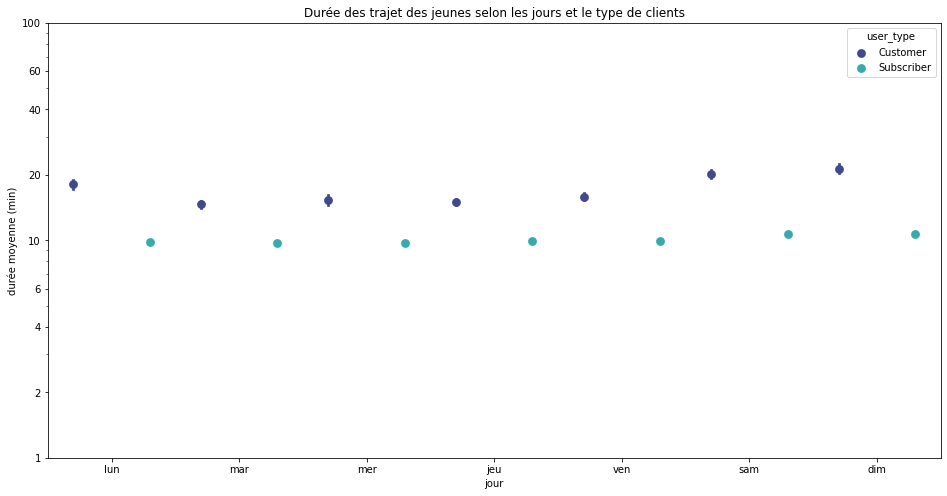

In [69]:
fig = plt.figure(figsize=[16,8])
ax = sb.pointplot(data=jeunes, x='jour', y='duration_min', hue='user_type', linestyles="", palette='mako', dodge=0.6)
plt.title('Durée des trajet des jeunes selon les jours et le type de clients')
plt.ylabel('durée moyenne (min)')
plt.yscale('log')
plt.yticks([1,2,4,6,10,20,40,60,100],[1,2,4,6,10,20,40,60,100])
plt.show()

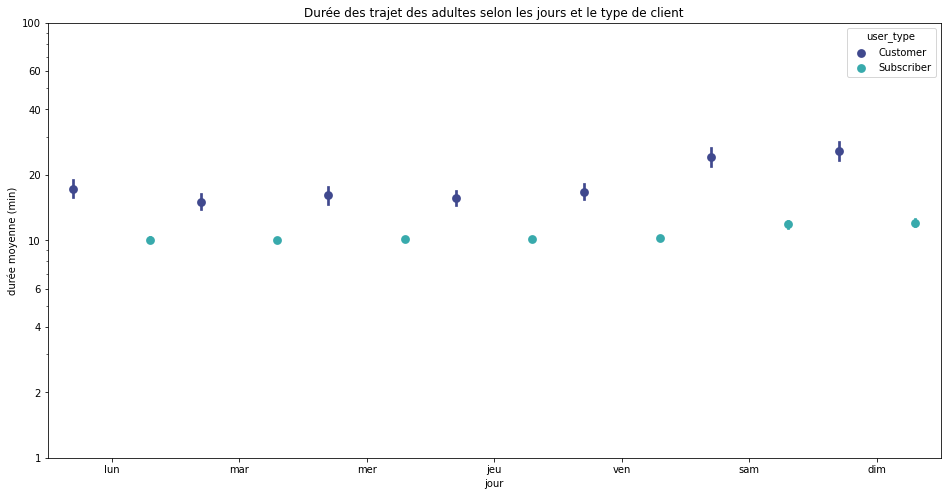

In [70]:
fig = plt.figure(figsize=[16,8])
ax = sb.pointplot(data=adults, x='jour', y='duration_min', hue='user_type', linestyles="", palette='mako', dodge=0.6)
plt.title('Durée des trajet des adultes selon les jours et le type de client')
plt.ylabel('durée moyenne (min)')
plt.yscale('log')
plt.yticks([1,2,4,6,10,20,40,60,100],[1,2,4,6,10,20,40,60,100])
plt.show()

> Quelle que soit la catégorie d'âge les clients qui ne sont pas abonnés font les plus longs trajets avec un pic les week-ends.

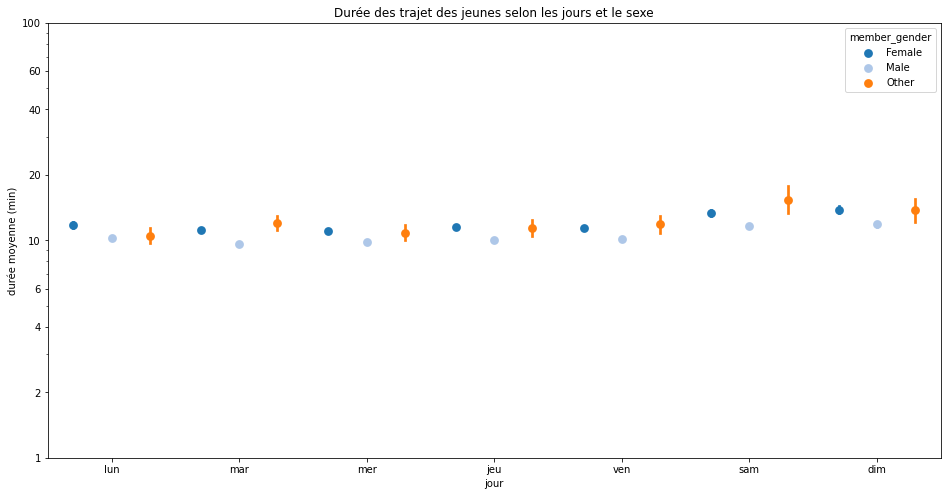

In [71]:
fig = plt.figure(figsize=[16,8])
ax = sb.pointplot(data=jeunes, x='jour', y='duration_min', hue='member_gender', linestyles="", palette='tab20', dodge=0.6)
plt.title('Durée des trajet des jeunes selon les jours et le sexe')
plt.ylabel('durée moyenne (min)')
plt.yscale('log')
plt.yticks([1,2,4,6,10,20,40,60,100],[1,2,4,6,10,20,40,60,100])
plt.show()

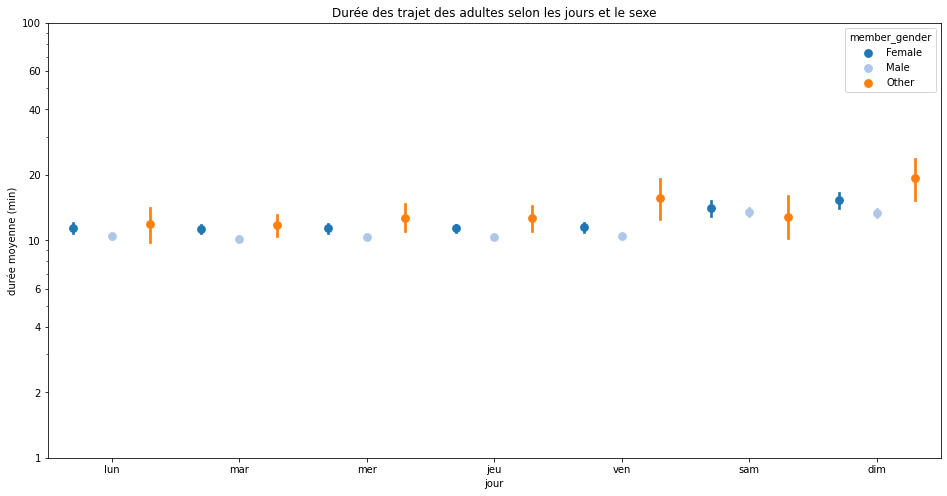

In [72]:
fig = plt.figure(figsize=[16,8])
ax = sb.pointplot(data=adults, x='jour', y='duration_min', hue='member_gender', linestyles="", palette='tab20', dodge=0.6)
plt.title('Durée des trajet des adultes selon les jours et le sexe')
plt.ylabel('durée moyenne (min)')
plt.yscale('log')
plt.yticks([1,2,4,6,10,20,40,60,100],[1,2,4,6,10,20,40,60,100])
plt.show()

> Quel que soit le jour de la semaine et la catégorie d'âges les femmes font les de plus long trajet par rapport aux hommes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Dans cette section j'ai voulu comprendre plus les relations qui lient la durée des trajets et les autres caractéristiques le jour, l'âge, le genre, les heures dès la journée et le type de vélo. Nous avons pu observer qu'en général les femmes font des trajets et sont jeunes, contrairement aux hommes qui sont plus âgés et font généralement de courts trajets. Nous avons pu observer aussi que les jeunes utilisent le système les week-ends surement à des fins de loisir, tandis que les courts trajets effectués en cours de semaines pour des personnes âgées sont en fait pour le travail.

### Were there any interesting or surprising interactions between features?

> Les interactions entre les variables sont complémentaires. Je ne m'attendais pas ce que les femmes soient ceux qui effectuent les de trajets de plus long duré, ni que les non abonnés n'utilisent les systèmes plus que les clients abonnent. Cela s'explique par le fait que les abonnés sont légèrement plus âgés et sont principalement des hommes.

## Conclusions
> Dans cette exploration, j'ai commencé par une visualisation univariée afin de voir les distributions des différends que j'ai pensé qui ils peuvent m'aider dans à atteindre mon but qui de connaitre les caractéristiques qui affectent la durée des trajets. Ensuite la visualisation bivariée qui a permis d'établir les dépendances qu'il a entre les caractéristiques.
Pour finir la visualisation multivariée qui consolide les différentes observations effectuées dans les étapes précédentes.
> Nous savons que les trajets sont effectués par les jeunes qui sont en majorité pas abonnées et utilise le système le plus le week-end une grande partie cette population sont des femmes.